Nguyễn Đình Thông
MSSV: 19146398

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
#Import Library
from keras.utils                  import np_utils
from keras.models                 import Sequential
from keras.layers                 import Dense, Activation, BatchNormalization, Dropout, LSTM
from keras.layers                 import Conv2D
from keras.layers                 import MaxPooling2D
from keras.layers                 import Flatten
from keras.callbacks              import EarlyStopping 
from tensorflow.keras.optimizers  import SGD
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image             import imread

In [48]:
from keras import datasets, Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import  image
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator
import numpy as np
import os
import cv2 as cv
danhsach = ['Ghetom','Giandu','Hanhphuc','Ngacnhien']
dir_train = '/content/drive/MyDrive/Emotions' 
distpath = []
y_train = []
x_train = []
x_test = []
y_test = []
# Create data
def create_data(dir, x_train, y_train):
  for i in danhsach:
    path = os.path.join(dir,i)
    index_label = danhsach.index(i)
    for j in os.listdir(path):
      img_path = os.path.join(path, j)
      img = image.load_img(img_path, target_size=(150,150))
      img = img_to_array(img)
      img = img.reshape(150,150,3)
      img = img.astype('float32')
      img = img/255
      x_train.append(img)
      y_train.append(index_label)
create_data(dir_train, x_train, y_train) 

x_train = np.array(x_train)
y_train = np.array(y_train)
y_train = np_utils.to_categorical(y_train)
print(x_train.shape) 
print(y_train.shape)


(80, 150, 150, 3)
(80, 4)


In [38]:
#Create model
model=Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150, 150, 3))) 
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128,activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(4,activation='sigmoid'))


In [51]:
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='binary_crossentropy',optimizer=opt, metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs = 100)


Epoch 1/100
3/3 [==============================] - 3s 699ms/step - loss: 4.3424 - accuracy: 0.3000
Epoch 2/100
3/3 [==============================] - 1s 455ms/step - loss: 5.6221 - accuracy: 0.2750
Epoch 3/100
3/3 [==============================] - 1s 428ms/step - loss: 1.0150 - accuracy: 0.2375
Epoch 4/100
3/3 [==============================] - 1s 427ms/step - loss: 0.6737 - accuracy: 0.3375
Epoch 5/100
3/3 [==============================] - 1s 450ms/step - loss: 0.6298 - accuracy: 0.4750
Epoch 6/100
3/3 [==============================] - 1s 440ms/step - loss: 0.5717 - accuracy: 0.5250
Epoch 7/100
3/3 [==============================] - 2s 489ms/step - loss: 0.5489 - accuracy: 0.4125
Epoch 8/100
3/3 [==============================] - 1s 422ms/step - loss: 0.5410 - accuracy: 0.5500
Epoch 9/100
3/3 [==============================] - 1s 434ms/step - loss: 0.5063 - accuracy: 0.7625
Epoch 10/100
3/3 [==============================] - 1s 428ms/step - loss: 0.4923 - accuracy: 0.7125
Epoch 11/

In [52]:
#Save file
model.save('/content/drive/MyDrive/Emotions/Emo.h5')

Giá trị dự đoán: 2
Hạnh phúc


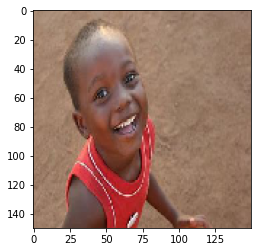

In [28]:
#Predict
pic = image.load_img('HP1.jpg', target_size=(150,150)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)
print('Giá trị dự đoán:', np.argmax(model.predict(pic)))
if np.argmax(model.predict(pic)) == 0:
   print("Ghê tởm")
if np.argmax(model.predict(pic)) == 1:
   print("Giận dữ")
if np.argmax(model.predict(pic)) == 2:
   print("Hạnh phúc")
if np.argmax(model.predict(pic)) == 3:
   print("Ngạc nhiên")

Giá trị dự đoán: 1
Giận dữ


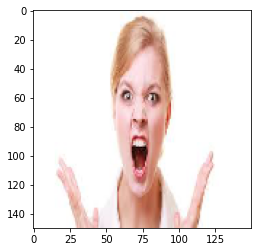

In [31]:
pic = image.load_img('GD2.jpg', target_size=(150,150)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)
print('Giá trị dự đoán:', np.argmax(model.predict(pic)))
if np.argmax(model.predict(pic)) == 0:
   print("Ghê tởm")
if np.argmax(model.predict(pic)) == 1:
   print("Giận dữ")
if np.argmax(model.predict(pic)) == 2:
   print("Hạnh phúc")
if np.argmax(model.predict(pic)) == 3:
   print("Ngạc nhiên")

Giá trị dự đoán: 0
Ghê tởm


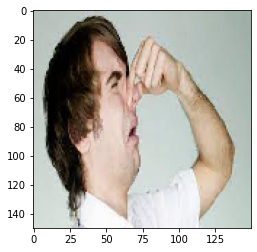

In [40]:
pic = image.load_img('GT3.jpg', target_size=(150,150)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)
print('Giá trị dự đoán:', np.argmax(model.predict(pic)))
if np.argmax(model.predict(pic)) == 0:
   print("Ghê tởm")
if np.argmax(model.predict(pic)) == 1:
   print("Giận dữ")
if np.argmax(model.predict(pic)) == 2:
   print("Hạnh phúc")
if np.argmax(model.predict(pic)) == 3:
   print("Ngạc nhiên")

Giá trị dự đoán: 3
Ngạc nhiên


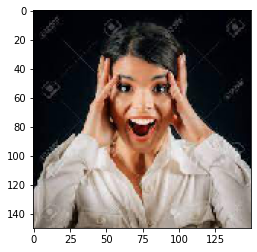

In [53]:
pic = image.load_img('NN3.jpg', target_size=(150,150)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)
print('Giá trị dự đoán:', np.argmax(model.predict(pic)))
if np.argmax(model.predict(pic)) == 0:
   print("Ghê tởm")
if np.argmax(model.predict(pic)) == 1:
   print("Giận dữ")
if np.argmax(model.predict(pic)) == 2:
   print("Hạnh phúc")
if np.argmax(model.predict(pic)) == 3:
   print("Ngạc nhiên")